# Scikit Learn Project

Scikit Learn webpage: https://scikit-learn.org/stable/

***

## Table of Contents

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1. [Introduction](#Introduction) <br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; * <br>

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2. Exploratory Analysis <br>

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3. <br>

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4. <br>

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5. <br>


<br>

# TO DO

- Re-do classification algorithms passing through only the four columns with highest correlations to quality. 

- look at Ian's Simple linear regression notebook: https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/simple-linear-regression.ipynb to improve the diabetes code

## Definitions 
- Regression analysis is a way of mathematically sorting out which of those variables does indeed have an impact.

## Layout
- Intro
- Exploratory
- Classification Analysis (Logistic regression is basically a supervised classification algorithm.*)
- Regression
***

<br>

## Objective
***

To predict the quality score of the wine based on its chemical properties. 
Regression and classification can be applied to this dataset. 

<br>
<a href=#Introduction></a>


## Introduction
***

As we strive for a 'smarter' world the use of machine learning (ML) algorithms is increasing rapidly. ML algorithms usage is widespread spanning areas such as business, medicine, consumer experience and security practices (an example of such is facial recognition). For this reason, efficient ML software is an indispensible asset.

Scikit learn, also known as Sklearn, is an open-source machine learning (ML) library for python which is built on top of NumPy, SciPy and Matplotlib.[https://towardsdatascience.com/scikit-learn-vs-sklearn-6944b9dc1736] The Scikit learn library provides a wide range of supervised and unsupervised learning algorithms. The supervised learning approach "trains" or "supervises" algorithms on labeled data sets which can then classify data or acurately predict outcomes. 

#### Supervised vs. Unsupervised

The majority of ML algorithms are supervised where there are input and output variables or labels. Supervised algorithms use these variables to analyse and train the data, producing an inferred function which is then used to map out new examples. A key process in all of this is generalising the training data and ideally, correctly determining the features for unseen data.[https://en.wikipedia.org/wiki/Supervised_learning] The statistical quality of an algorithm (how accurately the algorithm predicts the outcome values) can be measured using generalization error. Generalization error assesses the risk for sampling error, 'the difference between the sample statistic and population parameter' to ensure [Sarndal, Swenson, and Wretman (1992), Model Assisted Survey Sampling, Springer-Verlag, ISBN 0-387-40620-4]




This data set can be found at: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Article based on this data set: https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub

Useful article: <br>
Regression from scratch — Wine quality predictionhttps://medium.datadriveninvestor.com/regression-from-scratch-wine-quality-prediction-d61195cb91c8

## Import libraries
***

In [211]:
# Numerical array.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Plotting nice statistical plots.
import seaborn as sns

# Metrics
import sklearn.metrics as met

# Scikit learn datasets.
from sklearn import datasets

# Opens URLs.
import urllib.request as urllib


#LINEar regre, 
#rom sklearn.linear_model import LinearRegression


In [212]:
# Adjusting plot size to standard size.
plt.rcParams['figure.figsize'] = (15, 10)

# Setting colour scheme.
plt.style.use('ggplot')

## Load the data
***

In [213]:
# Loading the Wine Quality Data Set
df = pd.read_csv("data/winequality_red.csv")    # Using the red wine data set

# View the first few lines of data set.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Eyeball the data
***

In [214]:
# Check shape (rows, columns).
df.shape

(1599, 12)

In [215]:
# Check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [216]:
# Retrieve general information about the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Converted dataset from xlxs file to csv and corrected the csv file by replacing all of the semi-colons with commas.

## Describe the data
***

In [217]:
# Statistical summary
df.describe().round(2)  # round data to 2 decimal places

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [218]:
# Store a list with column names for repeated use.
col_names = df.columns
col_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<br>

## Visualising the data

***

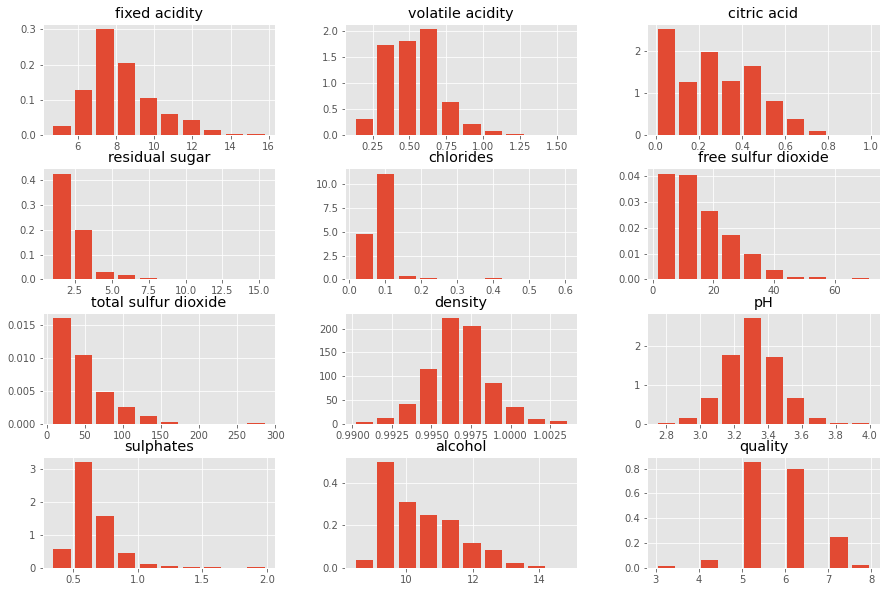

In [219]:
# Histogram and normal distribution plot of each variable
df.hist(rwidth=0.8, density=True);

<br>

### Correlations Map
***


Using the seaborn correlation heatmap, we can visualise the highest correlations between individual variables and quality(the dependent variable). 

In [220]:
# Get correlation values. 
correlations = df.corr()['quality'].drop('quality')
correlations

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

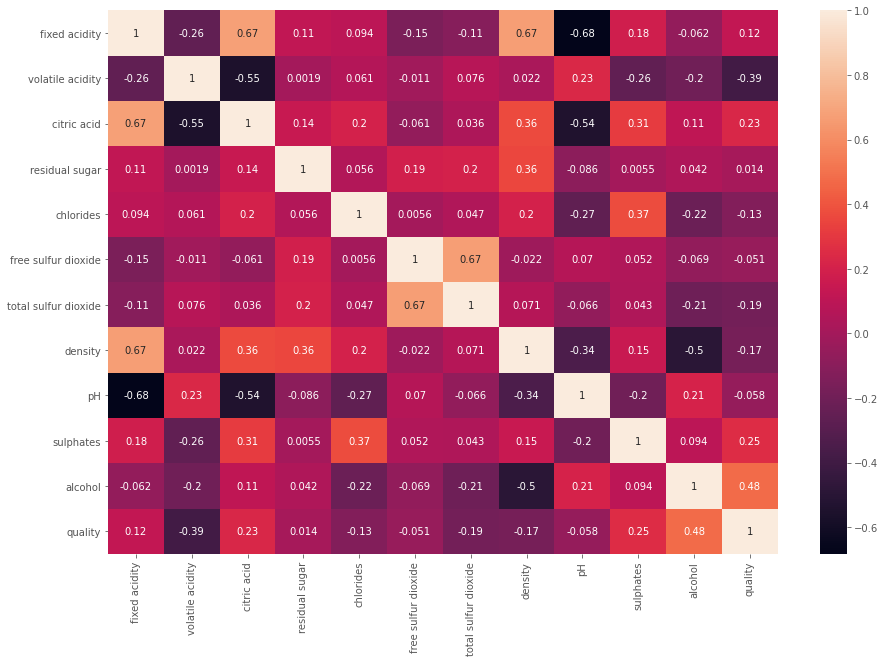

In [221]:
# Correlations heatmap.
sns.heatmap(df.corr(), annot=True);

Most significant correalations:
- positive correlation between alcohol and quality. 
- negative correlation between quality and volatile acidity. 

### Get list of features with significant correlations
***

In [222]:
# Gets absolute numeric values of correlation results.
abs_corrs = correlations.abs()

# Save column names with correlations over 0.05 to list.
high_corrs = abs_corrs[abs_corrs.values > 0.05].index.values.tolist()

high_corrs

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

So here, we return the returned the values that had a correlation value of more than 0.05.

"Usually, a significance level (denoted as α or alpha) of 0.05 works well. An α of 0.05 indicates that the risk of concluding that a correlation exists—when, actually, no correlation exists—is 5%. The p-value tells you whether the correlation coefficient is significantly different from 0.

P-value ≤ α: The correlation is statistically significant

If the p-value is less than or equal to the significance level, then you can conclude that the correlation is different from 0.

P-value > α: The correlation is not statistically significant

If the p-value is greater than the significance level, then you cannot conclude that the correlation is different from 0."[https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=Usually%2C%20a%20significance%20level%20(denoted,is%20significantly%20different%20from%200.]

This returns all of the values apart from residual sugar (quality was dropped earlier). 

<br>

### Visualising Two Dimensions
***

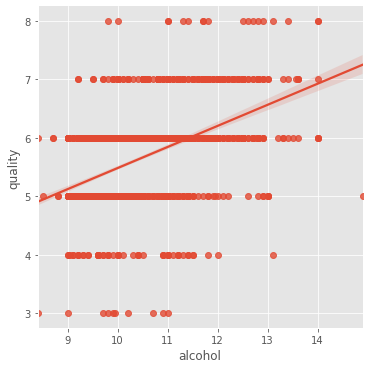

In [223]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.lmplot(x="alcohol", y="quality", data=df);

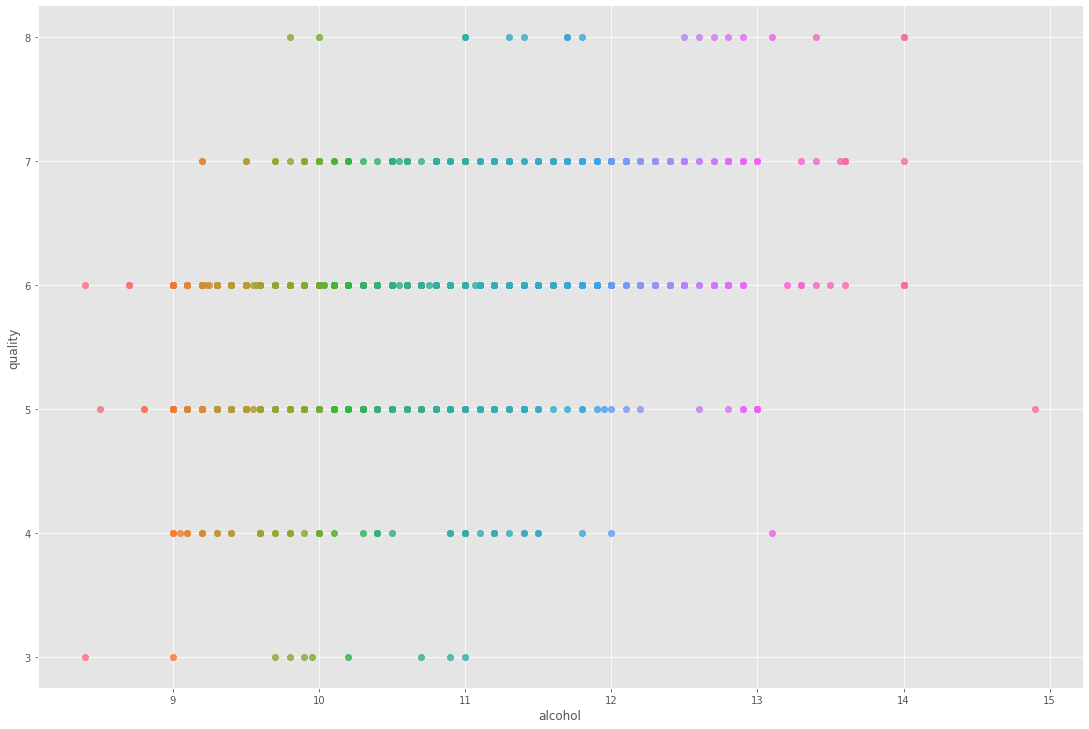

In [224]:
# Put this data as barchart
# Seaborn plot using quality variable to distinguish data points
sns.lmplot(x="alcohol", y="quality", hue='alcohol', data=df, fit_reg=False, height=10, aspect=1.5, legend=False);

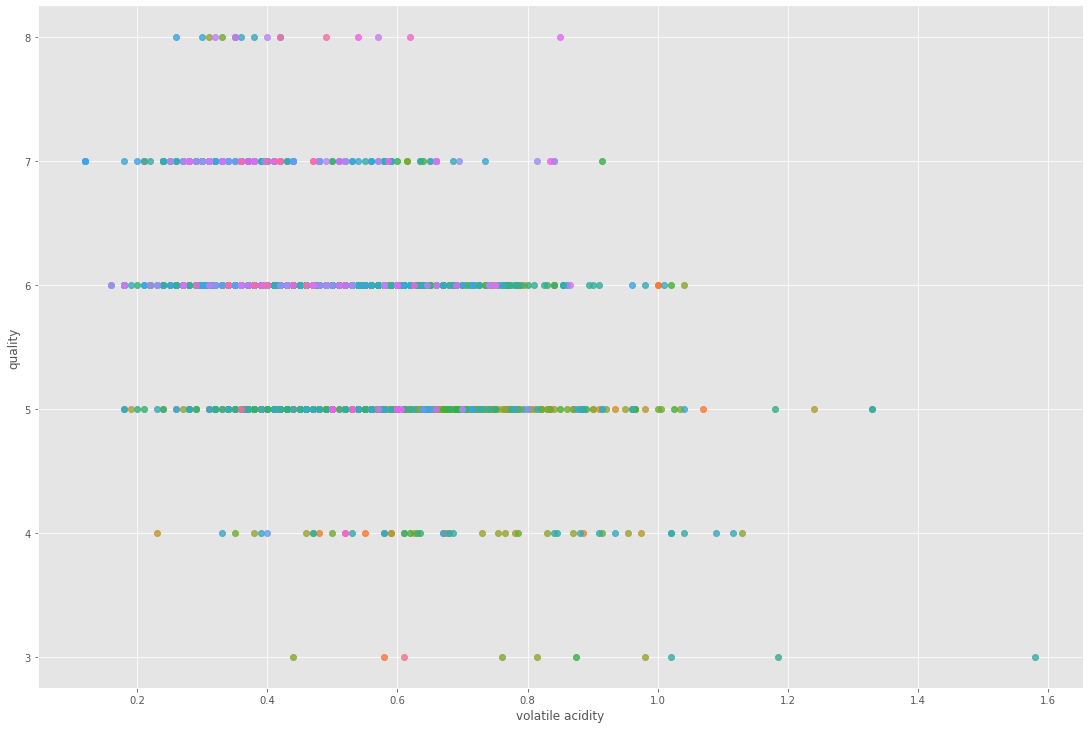

In [225]:
sns.lmplot(x="volatile acidity", y="quality", hue='alcohol', data=df, fit_reg=False, height=10, aspect=1.5, legend=False);


In [226]:
# Grouping by quality
group = df.groupby('quality')
group

In [227]:
# Pivot tables.
group.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [228]:
# Creates a list of variable names
col_names = list(df.columns)

<br>
The following plots were generated using seaborn to visualise the spread of data.

Each plot below represents individual variables in the data set. 

Source: https://seaborn.pydata.org/generated/seaborn.boxplot.html

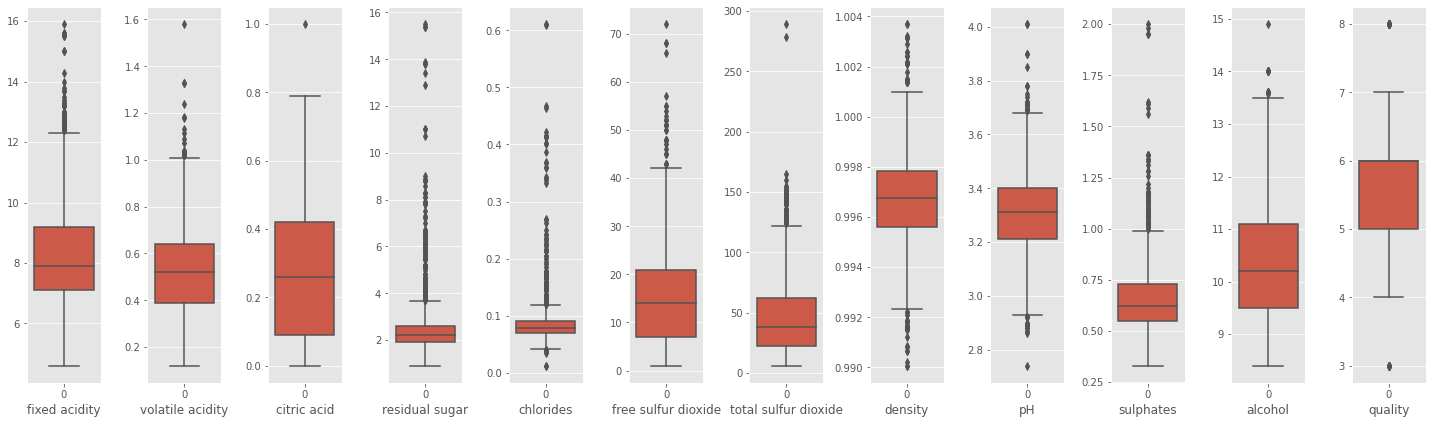

In [229]:
# Box plots.
fig = plt.figure(figsize=(20, 6)) # figsize = width, height in inches.
gs = fig.add_gridspec(1, 12) # A grid for which we can place the data.

count = 0
for var in col_names:
    # Customises grid layout using GridSpec.
    ax = fig.add_subplot(gs[0, count])
    sns.boxplot(data=df[var])
    ax.set_xlabel(var)
    count += 1

fig.tight_layout()
plt.show()

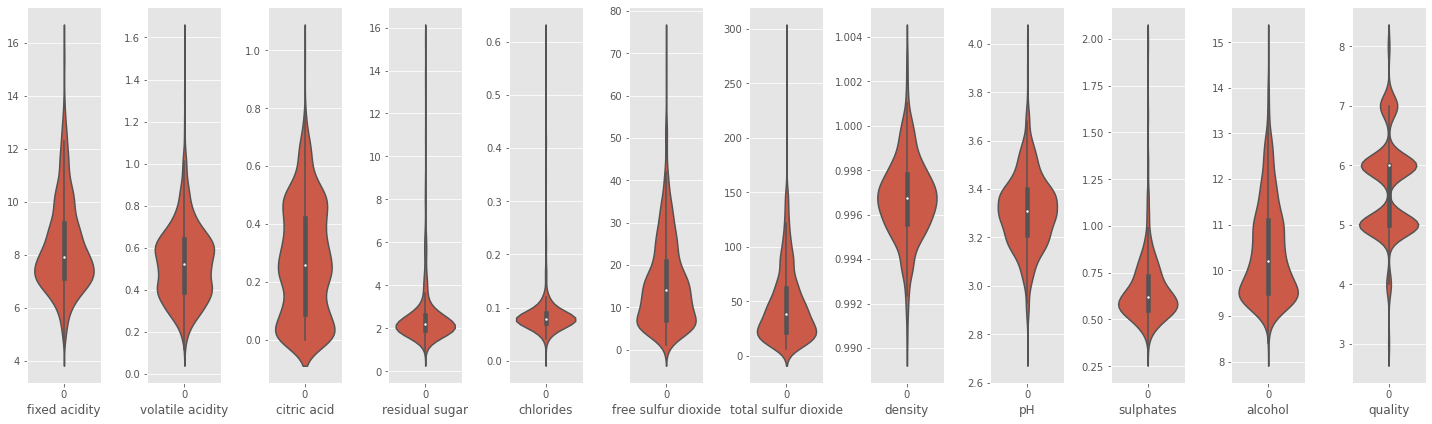

In [230]:
# Violin Plot
fig = plt.figure(figsize=(20, 6)) # figsize = width, height in inches.
gs = fig.add_gridspec(1, 12) # A grid for which we can place the data.

count = 0
for var in col_names:
    # Customises grid layout using GridSpec.
    ax = fig.add_subplot(gs[0, count])
    sns.violinplot(data=df[var])
    ax.set_xlabel(var)
    count += 1

fig.tight_layout()
plt.show()

Observations for each variable:

- Quality: most values are between 5 and 7. While there are no values in categories 1, 2 and 10 and few values in categories 3, 4 ad 9. 
- 
See https://online.stat.psu.edu/stat508/lesson/wqd/wqd.1 for more observations.

# Test and Train Split
***

In [231]:
# Splits the dataframe.
train, test = mod.train_test_split(df, test_size = 0.2)

In [232]:
# Views some of the training data.
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7
510,12.4,0.42,0.49,4.6,0.073,19.0,43.0,0.99780,3.02,0.61,9.5,5
521,7.6,0.41,0.49,2.0,0.088,16.0,43.0,0.99800,3.48,0.64,9.1,5
1290,7.6,0.74,0.00,1.9,0.100,6.0,12.0,0.99521,3.36,0.59,11.0,5
1077,8.6,0.37,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5


In [233]:
# View indices of train array.
train.index

Int64Index([1544,  510,  521, 1290, 1077, 1074,  859,  691,   51,  774,
            ...
            1533,  271, 1116,  463, 1109, 1319, 1193, 1475,  926,  232],
           dtype='int64', length=1279)

In [234]:
# Shows some test data.
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
380,8.3,0.26,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,6
1552,6.3,0.68,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,6
862,7.5,0.42,0.32,2.7,0.067,7.0,25.0,0.99628,3.24,0.44,10.4,5
982,7.3,0.52,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,6
860,7.2,0.62,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5


In [235]:
# Size of test data set.
test.index.size

320

<br>

## Checking the Test & Train Data

***

Ideally, we want the data to be segregated evenly throughout the data set. To check this, the following block of code was implemented to create a plot which depicts the test data as x's. As can be seen, the test data chose by scikit learn was evenly segregated from the data set. 

In [236]:
# With training data, specify inputs & outputs.
inputs = train[col_names]
outputs = train['quality']

In [237]:
inputs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7
510,12.4,0.42,0.49,4.6,0.073,19.0,43.0,0.99780,3.02,0.61,9.5,5
521,7.6,0.41,0.49,2.0,0.088,16.0,43.0,0.99800,3.48,0.64,9.1,5
1290,7.6,0.74,0.00,1.9,0.100,6.0,12.0,0.99521,3.36,0.59,11.0,5
1077,8.6,0.37,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5


In [238]:
print(outputs)

1544    7
510     5
521     5
1290    5
1077    5
       ..
1319    6
1193    5
1475    7
926     6
232     6
Name: quality, Length: 1279, dtype: int64


In [239]:
# Check that line 727 matches original data. 
df.iloc[727]

fixed acidity            6.400
volatile acidity         0.570
citric acid              0.020
residual sugar           1.800
chlorides                0.067
free sulfur dioxide      4.000
total sulfur dioxide    11.000
density                  0.997
pH                       3.460
sulphates                0.680
alcohol                  9.500
quality                  5.000
Name: 727, dtype: float64

<br>

## Two Dimensions: Logistic Regression??

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [240]:
# Creates a new classifier.
# Solver & max iters info. https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
lre = lm.LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000) # Parameter is random state, meaning it uses the same random process each time.

# Train the classifier on the data.
lre.fit(inputs[['alcohol', 'volatile acidity']], outputs)



LogisticRegression(max_iter=1000, random_state=0)

In [241]:
# Classifies test data.
predictions = lre.predict(test[['alcohol', 'volatile acidity']])
predictions

array([5, 6, 6, 7, 5, 6, 5, 5, 5, 6, 5, 7, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5,
       6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 6,
       5, 5, 5, 7, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 5, 5,
       7, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6,
       6, 6, 5, 7, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 7,
       5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 5, 7, 5, 6, 6, 5, 5, 7, 6, 6, 5, 5, 5, 5, 5, 7, 6, 5,
       5, 5, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6,
       7, 6, 5, 5, 5, 6, 6, 5, 5, 7, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6,

In [242]:
# View the misclassifications.
predictions == test['quality']

380     False
1552     True
862     False
982     False
860      True
        ...  
799      True
1532    False
493      True
58       True
25       True
Name: quality, Length: 320, dtype: bool

## Accuracy
***

In [243]:
# How accurate was the algorithm?
lre.score(test[['alcohol', 'volatile acidity']], test['quality'])

0.5375

<br>

## Misclassified

In [244]:
# Show the predictions with a column the table. 
test['predicted'] = predictions
test.head()

/var/folders/xq/j7llnxgx78d984nx_t1lty9c0000gn/T/ipykernel_1334/2389557802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
380,8.3,0.26,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,6,5
1552,6.3,0.68,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,6,6
862,7.5,0.42,0.32,2.7,0.067,7.0,25.0,0.99628,3.24,0.44,10.4,5,6
982,7.3,0.52,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,6,7
860,7.2,0.62,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5,5


In [245]:
# Shows the misclassified data.
misclass = test[test['predicted'] != test['quality']]
misclass

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
380,8.3,0.260,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,6,5
862,7.5,0.420,0.32,2.7,0.067,7.0,25.0,0.99628,3.24,0.44,10.4,5,6
982,7.3,0.520,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,6,7
978,7.0,0.400,0.32,3.6,0.061,9.0,29.0,0.99416,3.28,0.49,11.3,7,6
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,7.9,0.310,0.32,1.9,0.066,14.0,36.0,0.99364,3.41,0.56,12.6,6,7
224,8.4,0.635,0.36,2.0,0.089,15.0,55.0,0.99745,3.31,0.57,10.4,4,5
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,5
1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6,7


In [246]:
test["quality"].count()

320

In [247]:
misclass.count()

fixed acidity           148
volatile acidity        148
citric acid             148
residual sugar          148
chlorides               148
free sulfur dioxide     148
total sulfur dioxide    148
density                 148
pH                      148
sulphates               148
alcohol                 148
quality                 148
predicted               148
dtype: int64

In [248]:
# View descriptive statistics for train quality.
round(train.groupby('quality').mean(), 3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.650,0.874,0.201,2.319,0.135,10.875,23.250,0.997,3.409,0.579,9.956
4,7.540,0.701,0.145,2.812,0.079,12.100,37.450,0.996,3.414,0.566,10.344
5,8.120,0.579,0.237,2.493,0.094,17.098,55.834,0.997,3.312,0.620,9.901
6,8.327,0.495,0.275,2.500,0.085,15.675,40.734,0.997,3.322,0.674,10.622
7,8.909,0.411,0.377,2.799,0.076,13.994,35.780,0.996,3.287,0.740,11.503
8,8.688,0.418,0.416,2.644,0.068,11.750,33.312,0.995,3.257,0.774,12.100


In [249]:
# View descriptive statistics for test quality.
round(test.groupby('quality').mean(), 3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predicted
quality,,,,,,,,,,,,
3,7.200,0.928,0.050,3.900,0.072,11.500,31.500,0.998,3.355,0.535,9.950,5.000
4,8.515,0.673,0.265,2.331,0.126,12.769,32.538,0.997,3.283,0.692,10.023,5.077
5,8.364,0.567,0.271,2.677,0.088,16.508,59.341,0.997,3.277,0.626,9.896,5.227
6,8.425,0.507,0.269,2.391,0.086,15.855,41.397,0.997,3.303,0.682,10.657,5.634
7,8.725,0.376,0.367,2.409,0.080,14.250,32.000,0.996,3.304,0.746,11.317,6.075
8,7.600,0.465,0.195,2.050,0.070,25.500,34.500,0.994,3.350,0.720,12.050,6.000


### Plot misclassifications
***

https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/main/iris-classification.ipynb

<br>

## Using All Inputs

***

In [250]:
df = pd.read_csv("data/winequality_red.csv")

In [251]:
# Split data frame in two
train, test = mod.train_test_split(df)

In [252]:
# Makes all variables inputs.
inputs, outputs = train[col_names], train['quality']

In [253]:
# Creates new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on the data.
lre.fit(inputs, outputs)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [254]:
# Classify, predicts the test data.
predictions = lre.predict(test[col_names])
predictions

array([6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 7, 6, 5, 5, 7, 7, 5, 6,
       6, 5, 6, 7, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 7, 5, 5, 6, 5, 5, 5, 6,
       6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 6, 8, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 7, 7,
       5, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 5, 6, 5, 7,
       7, 6, 6, 7, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 5, 5,
       7, 5, 5, 6, 6, 6, 5, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6,
       7, 6, 5, 6, 7, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5,
       5, 5, 7, 6, 5, 6, 5, 7, 6, 7, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5,
       7, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 7, 5, 6, 5, 6, 5, 5,
       6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 5, 5, 7, 5, 6, 7, 6, 6, 6, 6,
       6, 5, 5, 7, 5, 5, 6, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 7,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7, 5, 6, 6, 6, 6, 7,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6,

In [255]:
# Views the misclassifications.
(predictions == test['quality']).value_counts()

True     362
False     38
Name: quality, dtype: int64

In [256]:
# Percentage score.
lre.score(test[col_names], test['quality'])

0.905

In [257]:
# Append predictions column to test dataframe. 
test['predicted'] = predictions
test.head()

/var/folders/xq/j7llnxgx78d984nx_t1lty9c0000gn/T/ipykernel_1334/4025106790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
1173,7.6,0.36,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,6,6
1112,7.9,0.33,0.41,1.5,0.056,6.0,35.0,0.99396,3.29,0.71,11.0,6,6
264,12.5,0.56,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5,5
195,7.8,0.59,0.33,2.0,0.074,24.0,120.0,0.99680,3.25,0.54,9.4,5,5
321,9.3,0.61,0.26,3.4,0.090,25.0,87.0,0.99975,3.24,0.62,9.7,5,5


This algorithm predicted the correct quality based on the various chemical properties in "Enter number here" percent of cases. 

## Nearest Neighbours Classifier

[KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

***

In [258]:
# Load wine quality data set.
df = pd.read_csv("data/winequality_red.csv")

# List of the variables
col_names = df.columns # this was list(df.columns) before, incase problem. 

In [259]:
# Splits the dataframe in two.
train, test = mod.train_test_split(df)

In [260]:
# Uses all variables as inputs
inputs, outputs = col_names, 'quality'

In [261]:
# Classifier with 10 nearest neighbors. 
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [262]:
# Fit wih training data.
knn.fit(train[inputs], train[outputs])

KNeighborsClassifier()

In [263]:
# Test on the training data.
knn.score(train[inputs], train[outputs])

0.7389491242702252

In [264]:
# Predict.
predictions = knn.predict(test[inputs])

In [265]:
# Score/accuracy
(predictions == test['quality']).value_counts(normalize=True)

True     0.615
False    0.385
Name: quality, dtype: float64

In [266]:
# Add new column to test dataframe with predictions
test["predictions"] = predictions
test

/var/folders/xq/j7llnxgx78d984nx_t1lty9c0000gn/T/ipykernel_1334/1097304577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predictions"] = predictions


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predictions
203,7.0,0.420,0.35,1.6,0.088,16.0,39.0,0.99610,3.34,0.55,9.2,5,6
443,10.0,0.440,0.49,2.7,0.077,11.0,19.0,0.99630,3.23,0.63,11.6,7,7
1437,6.8,0.915,0.29,4.8,0.070,15.0,39.0,0.99577,3.53,0.54,11.1,5,5
1030,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7,6
1355,6.1,0.320,0.25,1.8,0.086,5.0,32.0,0.99464,3.36,0.44,10.1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,10.1,0.310,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,7,6
50,8.8,0.660,0.26,1.7,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,5,5
845,6.4,0.640,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5,6
1184,6.7,0.640,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,5


<br>

## Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [267]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[col_names], df['quality'])
scores

array([0.53125   , 0.55625   , 0.54375   , 0.490625  , 0.54545455])

In [268]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}") 

Mean: 0.5334659090909091 	 Standard Deviation: 0.022842322434789248


In [269]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[col_names], df['quality'])
scores

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.8625    , 0.834375  , 0.88125   , 0.90625   , 0.88401254])

In [270]:
print(f"Mean: {scores.mean()}, \t Standard Deviation: {scores.std()}")

Mean: 0.8736775078369906, 	 Standard Deviation: 0.02406136554709315


Logistic regression is a better algorithm for predicting the wine's quality based on its chemical components. 

## Minimising the cost
***

To do:

Explanation of minimising the cost. <br>
Formula.  Y= mx + b

In [271]:
polyfit = np.polyfit(df['alcohol'], df['quality'], 1)

In [272]:
# First value returned from polyfit function.
m = polyfit[0]

In [273]:
c = polyfit[1]

<br>

## Plot the best fit line
***

In [274]:
# Plot the best fit line.
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()

# Show the plot.
plt.show()

NameError: name 'x' is not defined

## Scikit learn - `linearRegression()` function

[Official Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
***

Multiple linear regression

- Explain linear regression

In [ ]:
# Load wine quality data set.
df = pd.read_csv("data/winequality_red.csv")

In [ ]:
# Split the data into input and output(target).
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 
             'residual sugar', 'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

y = df['quality'].values

In [ ]:
# Have a look at the quality count again.
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.displot(df['quality']);

In [ ]:
# Split the data for training and testing.
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2, random_state=0)

With the code above 80 percent of the data will be used for training the algorithm and the remaining 20 percent will be for testing. This is specified with the `test_size` parameter. 

In [ ]:
# Fit training data to the model.
regressor = lm.LinearRegression()
regressor.fit(x_train, y_train)

### Interpreting Regression Coefficients for Linear Relationships

"The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others." [https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/]

In [ ]:
# Return dataframe with features & coefficient values.
coef = pd.DataFrame({'Coefficient': regressor.coef_})
coef.index = [['fixed acidity', 'volatile acidity', 'citric acid', 
                   'residual sugar', 'chlorides', 'free sulfur dioxide', 
                   'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
coef

In [ ]:
# Predict quality in training data.
train_pred = regressor.predict(x_train)
regressor.score(x_train, y_train)

<br>

## `sklearn.metrics.mean_squared_error`

3.3. Metrics and scoring: quantifying the quality of predictions: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# calculating rmse
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

In [ ]:
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

In [ ]:
print('Mean Absolute Error:', met.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', met.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(met.mean_squared_error(y_test, test_pred)))

In [ ]:
# displaying coefficients of each feature
coeffecients = pd.DataFrame(regressor.coef_,features) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)